In [34]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [35]:
df = pd.read_csv('retail_price.csv')
df.head()


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [36]:
df.shape


(676, 30)

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [38]:
df.describe()


,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [39]:
df.isnull().sum()


product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [40]:
df = df.dropna()


In [41]:
df.duplicated().sum()

np.int64(0)

THERE IS NO DUPLICATED VALUES IN THIS DATASET

In [42]:
# FOR CHECKING THE DATATYPE
print(df.dtypes)

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

DATA PREPROCESSING

In [43]:
print(df.columns)

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')


In [44]:
for col in df.columns:
    print(col, ":", df[col].nunique())


product_id : 52
product_category_name : 9
month_year : 20
qty : 66
total_price : 573
freight_price : 653
unit_price : 280
product_name_lenght : 24
product_description_lenght : 46
product_photos_qty : 7
product_weight_g : 45
product_score : 11
customers : 94
weekday : 4
weekend : 3
holiday : 5
month : 12
year : 2
s : 450
volume : 40
comp_1 : 88
ps1 : 9
fp1 : 179
comp_2 : 123
ps2 : 10
fp2 : 242
comp_3 : 105
ps3 : 9
fp3 : 229
lag_price : 307


In [45]:
df['product_category_name'].unique()


array(['bed_bath_table', 'garden_tools', 'consoles_games',
       'health_beauty', 'cool_stuff', 'perfumery',
       'computers_accessories', 'watches_gifts', 'furniture_decor'],
      dtype=object)

In [46]:
df['product_category_name'].nunique()


9

In [47]:
df.nunique()


product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

ENCODING CATEGORICAL COLUMNS

In [48]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols


Index(['product_id', 'product_category_name', 'month_year'], dtype='object')

In [49]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


LabelEncoder

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [51]:
df[cat_cols].head()


,product_id,product_category_name,month_year
0,0,0,8
1,0,0,10
2,0,0,12
3,0,0,14
4,0,0,16


In [52]:
df.dtypes


product_id                      int64
product_category_name           int64
month_year                      int64
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

FEATURE SELECTION

In [53]:
df = df.drop(columns=[
    'product_id',
    'product_name_lenght',
    'product_description_lenght'
])


In [54]:
X = df[
    [
        'unit_price',
        'qty',
        'freight_price',
        'product_weight_g',
        'product_score',
        'customers',
        'weekday',
        'weekend',
        'holiday',
        'comp_1',
        'comp_2',
        'comp_3',
        'lag_price'
    ]
]


In [55]:
y = df['total_price']


In [56]:
print(X.shape)
print(y.shape)


(676, 13)
(676,)


DATA VISUALIZATION

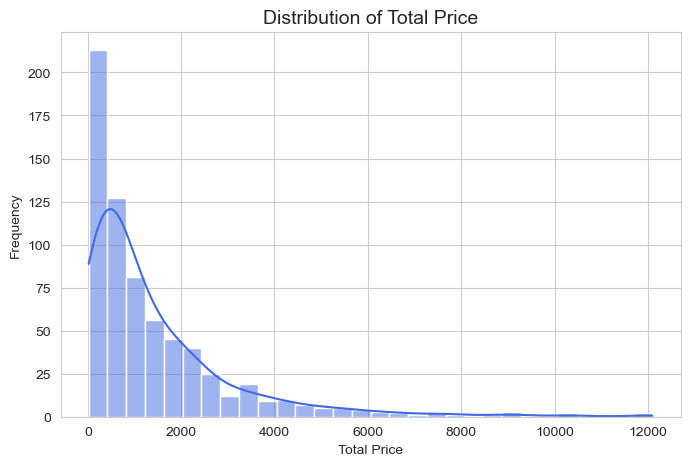

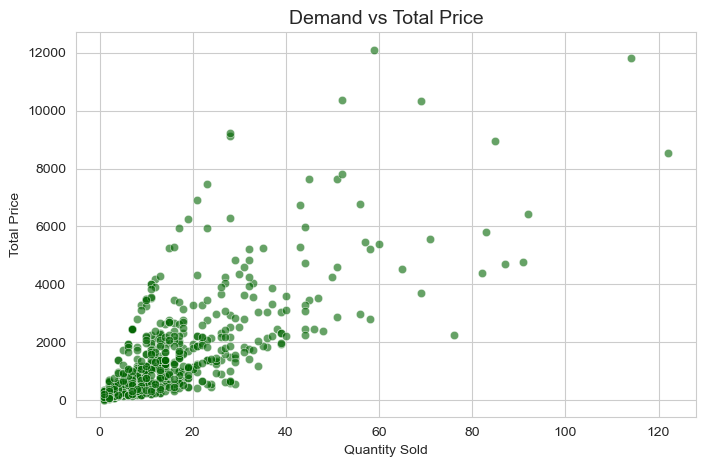

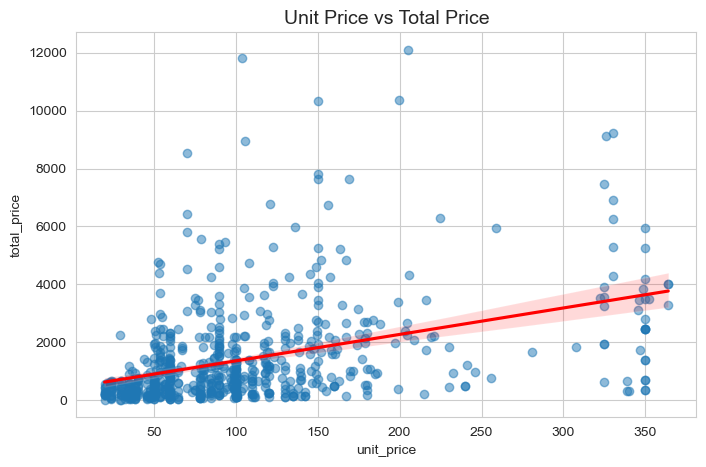

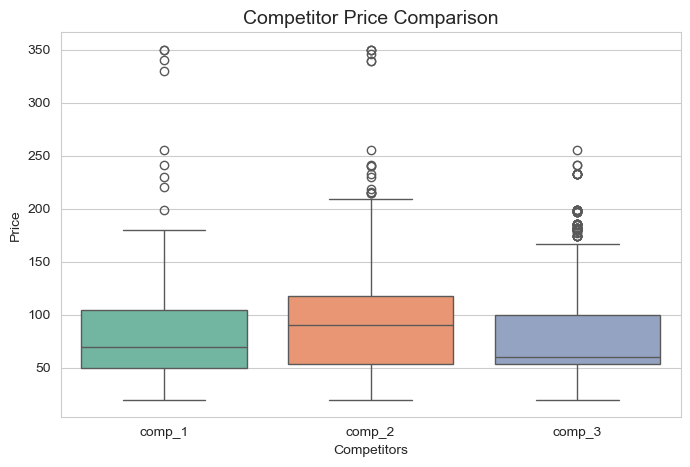

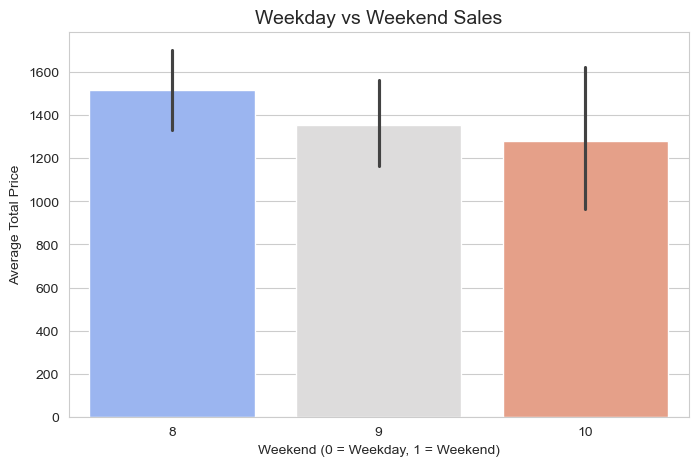

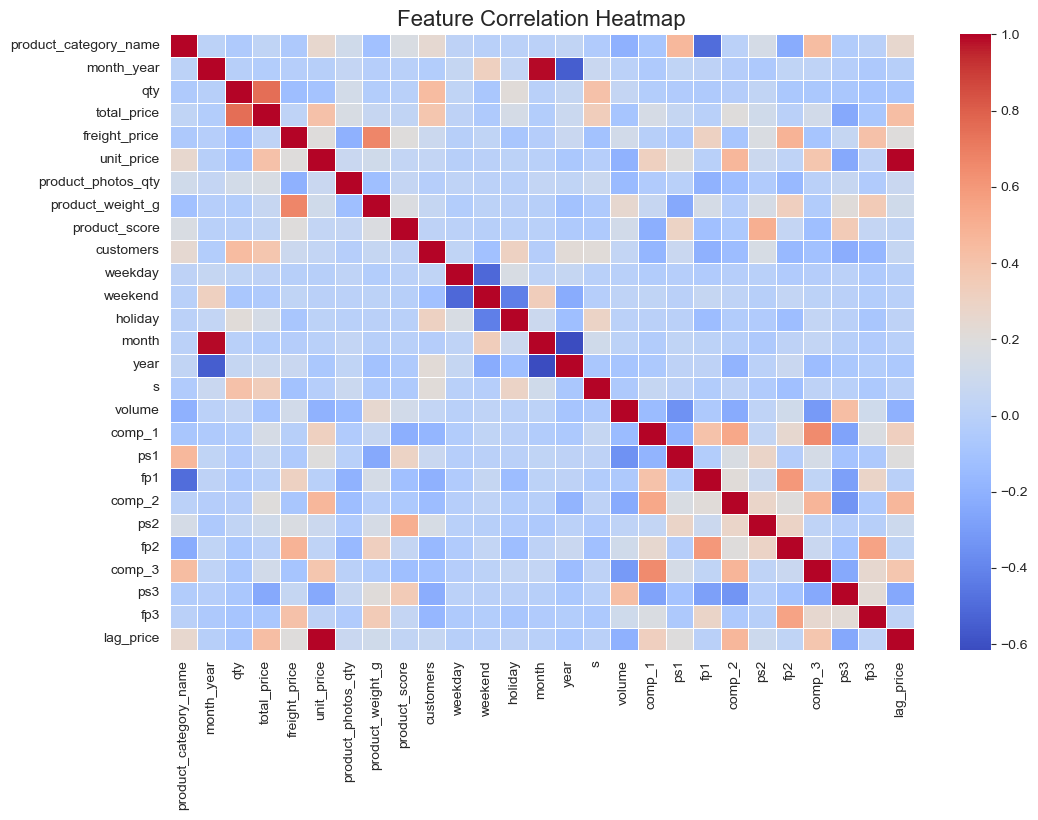

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

sns.histplot(
    df['total_price'],
    bins=30,
    kde=True,
    color="royalblue"
)
plt.title("Distribution of Total Price", fontsize=14)
plt.xlabel("Total Price")
plt.ylabel("Frequency")
plt.show()

sns.scatterplot(
    x='qty',
    y='total_price',
    data=df,
    color='darkgreen',
    alpha=0.6
)
plt.title("Demand vs Total Price", fontsize=14)
plt.xlabel("Quantity Sold")
plt.ylabel("Total Price")
plt.show()

sns.regplot(
    x='unit_price',
    y='total_price',
    data=df,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title("Unit Price vs Total Price", fontsize=14)
plt.show()

sns.boxplot(
    data=df[['comp_1', 'comp_2', 'comp_3']],
    palette="Set2"
)
plt.title("Competitor Price Comparison", fontsize=14)
plt.xlabel("Competitors")
plt.ylabel("Price")
plt.show()

sns.barplot(
    x='weekend',
    y='total_price',
    data=df,
    palette="coolwarm"
)
plt.title("Weekday vs Weekend Sales", fontsize=14)
plt.xlabel("Weekend (0 = Weekday, 1 = Weekend)")
plt.ylabel("Average Total Price")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


MODEL EVALUATION

In [58]:
from sklearn.model_selection import train_test_split


In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, random_state=42)


In [60]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (540, 13)
X_test: (136, 13)
y_train: (540,)
y_test: (136,)


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor( n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [62]:
y_pred = rf_model.predict(X_test)
y_pred

array([3281.4067, 1807.0245,  103.0961, 2307.267 ,  321.301 ,  509.5742,
       4889.3741, 4488.1568,  579.3375,  710.0218,  292.265 , 3188.6483,
         89.2867,  133.1092,  171.4917, 7555.4155, 2179.9073,  664.9035,
       5137.1112,   40.855 , 2321.3742, 1999.5634,  397.2299, 1465.6576,
       4501.2008,  336.0625,  494.6906,  109.3596,  806.6365, 1701.039 ,
        363.1707, 2069.3321,  198.9181, 2275.7274, 1365.1649,  156.151 ,
        757.2439,  224.846 , 2345.2156,  136.5072,  486.6402,  694.248 ,
        331.3796, 2374.1172,  694.6838, 1250.1998,  567.7972,   81.1933,
        494.8871, 2615.9332,  460.0569,  490.4284, 3400.0376,  544.0755,
        738.3373,  246.6018,  316.0664,  592.0491, 1169.925 ,  198.4756,
        202.5356,  805.5113,  927.983 , 1471.9857,   36.0552, 1310.6353,
       1727.4364,  327.6802, 4345.8989,  551.4147, 1653.1072,  994.1906,
        303.6843, 4793.5082,  300.3611,  495.6417,  924.9036,  481.5731,
        220.2945,  420.6724,  490.5667, 1263.121 , 

In [63]:
comparison = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred})

comparison.head()


,Actual Price,Predicted Price
641,3139.80,3281.4067
302,1819.86,1807.0245
369,99.90,103.0961
493,2179.00,2307.2670
579,299.97,321.3010


In [64]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}


In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)


In [66]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [67]:
grid_search.best_params_


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [68]:
best_model = grid_search.best_estimator_
print(best_model)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)


In [69]:
y_pred_best = best_model.predict(X_test)



In [70]:
best_score = grid_search.best_score_
best_score


np.float64(0.9347605160824294)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 108.51660675724712
RMSE: 397.2277930592309
R² Score: 0.9500494541577308


In [72]:
print("Test R² Score:", r2)
print("Best Cross-Validated R² Score:", best_score)


Test R² Score: 0.9500494541577308
Best Cross-Validated R² Score: 0.9347605160824294


SAVING MODEL

In [73]:
import pickle


In [74]:
with open("pricing_model.pkl", "wb") as file:
    pickle.dump(best_model, file)


In [75]:
with open("model_features.pkl", "wb") as file:
    pickle.dump(X.columns.tolist(), file)


In [76]:
with open("pricing_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)


In [77]:
loaded_model.predict(X_test[:5])


array([3115.09776956, 1834.21865093,  102.97399533, 2344.65513823,
        318.83580143])